# Analyse des Données - Cas Sixt

Faire tourner les cellules "Question 1" à "Question 9".
Penser à les lire et comprendre leur résultats avant de se lancer directement dans la question 10.

## 1. Compréhension du Dataset

### Question 1 : Importer les packages et chargez les fichiers CSV fournis pour pouvoir les exploiter.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des fichiers CSV générés
clients = pd.read_csv("clients.csv")
locations = pd.read_csv("locations.csv")
paiements = pd.read_csv("paiements.csv")
avis_clients = pd.read_csv("avis_clients.csv")

### Question 2 : Combien de lignes et de colonnes contient chaque table ?

In [2]:
print("Clients:")
print(f"Lignes: {clients.shape[0]}, Colonnes: {clients.shape[1]}")
print("\nLocations:")
print(f"Lignes: {locations.shape[0]}, Colonnes: {locations.shape[1]}")
print("\nPaiements:")
print(f"Lignes: {paiements.shape[0]}, Colonnes: {paiements.shape[1]}")
print("\nAvis Clients:")
print(f"Lignes: {avis_clients.shape[0]}, Colonnes: {avis_clients.shape[1]}")

Clients:
Lignes: 5000, Colonnes: 11

Locations:
Lignes: 10000, Colonnes: 12

Paiements:
Lignes: 10000, Colonnes: 18

Avis Clients:
Lignes: 4509, Colonnes: 6


### Question 3 : Listez les types de variables et identifiez les modifications nécessaires.

In [3]:
print(clients.dtypes)
print(locations.dtypes)
print(paiements.dtypes)
print(avis_clients.dtypes)

client_id                   int64
date_inscription           object
genre                      object
age                         int64
type_client                object
ville                      object
pays                       object
programme_fidelite           bool
nombre_locations_total      int64
revenu_annuel             float64
métier                     object
dtype: object
location_id                     int64
client_id                       int64
date_location                  object
duree_location                  int64
type_vehicule                  object
type_carburant                 object
lieu_location                  object
kilométrage                   float64
prix_total                    float64
remise_appliquee                 bool
programme_fidelite_utilise       bool
premiere_location                bool
dtype: object
location_id                     int64
client_id                       int64
date_location                  object
duree_location              

### Question 4 : Convertissez les colonnes contenant des dates au format datetime pour faciliter l'analyse temporelle.

In [4]:
date_cols = ["date_inscription", "date_location", "date_paiement", "date_avis"]
for df in [clients, locations, paiements, avis_clients]:
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col])

## 2. Nettoyage et traitement des données

### Question 5 : Supprimez les éventuels doublons dans chaque table pour éviter les biais dans l'analyse.

In [5]:
clients.drop_duplicates(inplace=True)
locations.drop_duplicates(inplace=True)
paiements.drop_duplicates(inplace=True)
avis_clients.drop_duplicates(inplace=True)

### Question 6 : Identifiez et analysez les valeurs manquantes.

In [6]:
print(clients.isna().sum())
print(locations.isna().sum())
print(paiements.isna().sum())
print(avis_clients.isna().sum())

client_id                   0
date_inscription            0
genre                       0
age                         0
type_client                 0
ville                       0
pays                        0
programme_fidelite          0
nombre_locations_total      0
revenu_annuel             496
métier                      0
dtype: int64
location_id                     0
client_id                       0
date_location                   0
duree_location                  0
type_vehicule                   0
type_carburant                  0
lieu_location                   0
kilométrage                   760
prix_total                      0
remise_appliquee                0
programme_fidelite_utilise      0
premiere_location               0
dtype: int64
location_id                      0
client_id                        0
date_location                    0
duree_location                   0
type_vehicule                    0
type_carburant                   0
lieu_location             

### Question 7 : Remplacez les valeurs manquantes critiques et conservez celles qui sont pertinentes pour l'analyse.

Remplacez les valeurs manquantes suivantes :
  - 'ville' : Remplacez par "Inconnue".
  - 'métier' : Remplacez par "Inconnu".

- Conservez les NaN pour :
  - 'revenu_annuel' : Remplacez par la une valeur de la colonne comme la médiane pourrait fausser les analyses.
  - 'kilométrage' : Remplacez par une valeur de la colonne comme la médiane pourrait fausser les analyses.
  - 'date_paiement' : Peut être utile pour identifier les paiements en attente.
  - 'commentaire' : Permet d’analyser le taux de clients laissant un avis.

In [7]:
clients.fillna({"ville": "Inconnue", "métier": "Inconnu"}, inplace=True)

### Question 8 : Identifiez les clés de jointure entre les différentes tables.

In [8]:
print("Clés de jointure possibles:")
print("- 'client_id' présent dans clients, locations, paiements, avis_clients")
print("- 'location_id' présent dans locations, paiements, avis_clients")

Clés de jointure possibles:
- 'client_id' présent dans clients, locations, paiements, avis_clients
- 'location_id' présent dans locations, paiements, avis_clients


### Question 9 : Consolidez les bases de données en une seule Master Database après le nettoyage.

In [9]:
master_df = locations.merge(clients, on="client_id", how="left")
master_df = master_df.merge(paiements, on="location_id", how="left", suffixes=("", "_paiement"))
master_df = master_df.merge(avis_clients, on="location_id", how="left", suffixes=("", "_avis"))

In [10]:
master_df.head()

,location_id,client_id,date_location,duree_location,type_vehicule,type_carburant,lieu_location,kilométrage,prix_total,remise_appliquee,...,date_paiement,montant_paye,type_paiement,statut_paiement,remise_appliquée_en_%,avis_id,client_id_avis,note,commentaire,date_avis
0,1,4919,2025-01-31,15,Citadine,Diesel,Gare,497.0,932.07,True,...,2025-01-31,932.07,Carte bancaire,Réussi,14.0,5179.0,4919.0,5.0,Parfait de A à Z !,2025-02-20
1,2,14,2024-11-25,9,Citadine,Essence,Aéroport,231.0,675.40,False,...,2024-11-24,675.40,Carte bancaire,Réussi,NaN,2895.0,14.0,5.0,Excellent service !,2024-12-07
2,3,440,2024-12-01,21,Citadine,Hybride,Centre-ville,453.0,896.70,False,...,2024-11-30,896.70,Virement,Réussi,NaN,NaN,NaN,NaN,NaN,NaT
3,4,4089,2024-11-11,2,Citadine,Essence,Gare,944.0,185.61,False,...,2024-11-10,185.61,Carte bancaire,Réussi,NaN,NaN,NaN,NaN,NaN,NaT
4,5,4554,2024-02-26,25,Berline,Hybride,Aéroport,173.0,1218.55,False,...,2024-02-25,1218.55,PayPal,Réussi,NaN,NaN,NaN,NaN,NaN,NaT


## 3. Analyses statistiques

### Question 10 : Aanalyser les statistiques descriptives des variables numériques pour comprendre leur distribution.

*Utiliser les variables numériques suivantes : "revenu_annuel", "prix_total", "kilométrage", "duree_location", "montant_paye", "note"*

In [11]:
master_df[["revenu_annuel", "prix_total", "kilométrage", "duree_location", "montant_paye", "note"]].describe()

,revenu_annuel,prix_total,kilométrage,duree_location,montant_paye,note
count,8984.000000,10000.000000,9240.000000,10000.000000,10000.000000,4509.000000
mean,49590.161955,1165.498457,523.601515,15.467600,1165.498457,4.436682
std,17221.251447,797.857727,273.597595,8.632555,797.857727,0.856000
min,20027.000000,30.170000,50.000000,1.000000,30.170000,1.000000
25%,34847.500000,522.777500,286.000000,8.000000,522.777500,4.000000
50%,49334.000000,1009.450000,520.000000,15.000000,1009.450000,5.000000
75%,64331.000000,1677.282500,759.250000,23.000000,1677.282500,5.000000
max,79999.000000,3599.130000,999.000000,30.000000,3599.130000,5.000000


###Question 11 : Analysez les variables catégoriques en affichant la fréquence des valeurs uniques.

*Utiliser les variables catégorielles suivantes : "type_vehicule", "lieu_location", "programme_fidelite", "statut_paiement"*

In [12]:
col_cat = ["type_vehicule", "lieu_location", "programme_fidelite", "statut_paiement"]

for col in col_cat:
    print(f"\nles fréquences des valeurs unique de la colonne '{col}' sont:")
    print(f"{master_df[col].value_counts()}")



les fréquences des valeurs unique de la colonne 'type_vehicule' sont:
type_vehicule
Citadine      4031
SUV           2957
Berline       1976
Utilitaire    1036
Name: count, dtype: int64

les fréquences des valeurs unique de la colonne 'lieu_location' sont:
lieu_location
Aéroport        4073
Centre-ville    2971
Gare            2956
Name: count, dtype: int64

les fréquences des valeurs unique de la colonne 'programme_fidelite' sont:
programme_fidelite
False    7153
True     2847
Name: count, dtype: int64

les fréquences des valeurs unique de la colonne 'statut_paiement' sont:
statut_paiement
Réussi    9787
Échoué     213
Name: count, dtype: int64


## 4. Détection des Valeurs Extrêmes/Aberrantes

### Question 12 : Visualisez les valeurs aberrantes/extrêmes à l'aide de boxplots pour chaque variable concernée.

*Nous allons nous concentrer uniquement sur les variables où des valeurs extrêmes pourraient fausser les analyses.
Les variables sélectionnées pour cette analyse sont : revenu_annuel, prix_total, duree_location et note.*

### Boxplot revenu annuel

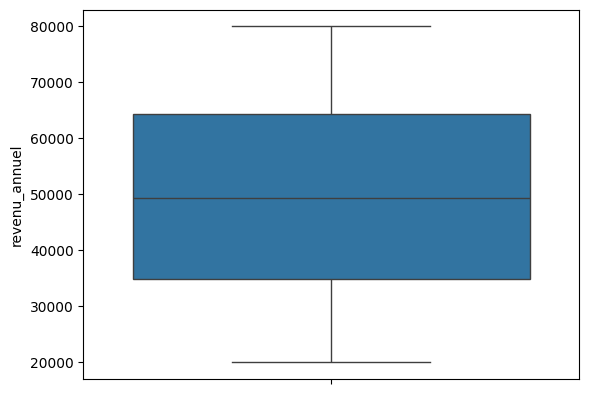

In [13]:
sns.boxplot(master_df['revenu_annuel'])
plt.show()

#### Observations:
   - On ne constate aucune valeur abérrante.

### Boxplot prix_total

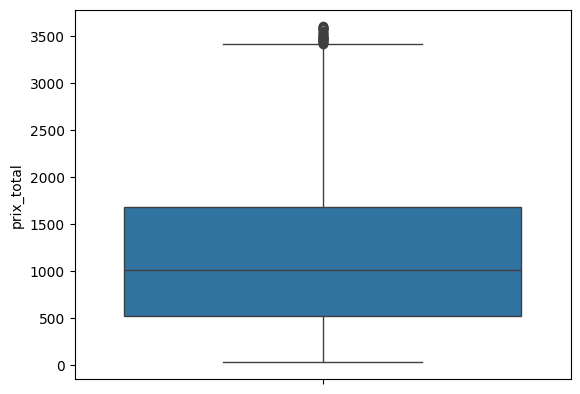

In [14]:
sns.boxplot(master_df['prix_total'])
plt.show()

#### Observations:
   - On constate des valeurs abérrantes au delà de 3500.

### Boxplot durée de location

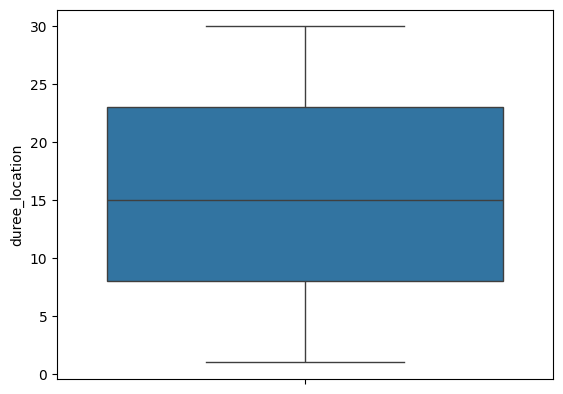

In [15]:
sns.boxplot(master_df['duree_location'])
plt.show()

#### Observations:
   - On ne constate aucune valeur abérrante.

### Boxplot notes

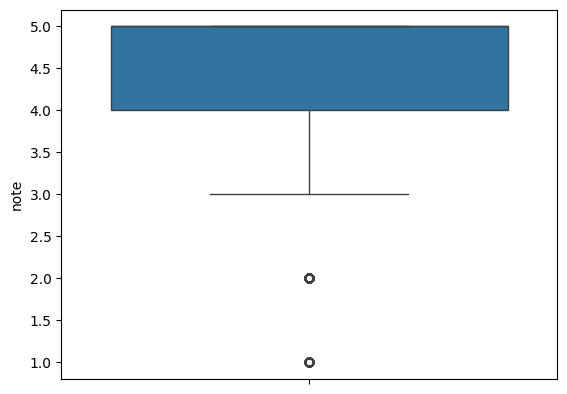

In [16]:
sns.boxplot(master_df['note'])
plt.show()

#### Observations:
   - On constate des valeurs abérrantes en dessous de la note de 3.

*******************************************************************************************************

### Question 13 : Identifiez les valeurs aberrantes/extrêmes en utilisant la méthode de l'écart interquartile (IQR). Que constatez-vous ?

*Nous allons nous concentrer uniquement sur les variables où des valeurs extrêmes pourraient fausser les analyses.
Les variables sélectionnées pour cette analyse sont : revenu_annuel, prix_total, duree_location et note.*

> _Attention, la fonction `np.percentile()` ne fonctionnent pas correctement lorsque des valeurs manquantes sont présentes, préférer la méthode `.quantile()`_

* Nous allons rechercher les quartiles, écarts interquartiles, bornes supérieure et inférieure et en déduire les valeurs extrêmes

In [17]:
# Nous allons rechercher les quartiles, écarts interquartiles, bornes supérieure et inférieure et en déduire les valeurs extrêmes
col_outliers = ["revenu_annuel", "prix_total", "duree_location", "note"]

for col in col_outliers:
    Q1 = master_df[col].quantile(0.25)
    Q3 = master_df[col].quantile(0.75)
    IQR = Q3-Q1

    BInf = Q1 - 1.5 * IQR
    BSup = Q3 + 1.5 * IQR
    print(f"\n'{col}'")
    print(f"premier quartile : {Q1}")
    print(f"troisième quartile: {Q3}")
    print(f"écart interquartile : {IQR}")
    print(f"borne inférieure : {BInf}")
    print(f"borne supérieure : {BSup}")

    outliers = []
    for x in master_df[col]:
        if x > BSup or x < BInf:
            outliers.append(x)
        else:
            continue
    print(f"    il y a {len(outliers)} valeurs aberrantes/extrêmes")




'revenu_annuel'
premier quartile : 34847.5
troisième quartile: 64331.0
écart interquartile : 29483.5
borne inférieure : -9377.75
borne supérieure : 108556.25
    il y a 0 valeurs aberrantes/extrêmes

'prix_total'
premier quartile : 522.7774999999999
troisième quartile: 1677.2825
écart interquartile : 1154.505
borne inférieure : -1208.9800000000002
borne supérieure : 3409.04
    il y a 33 valeurs aberrantes/extrêmes

'duree_location'
premier quartile : 8.0
troisième quartile: 23.0
écart interquartile : 15.0
borne inférieure : -14.5
borne supérieure : 45.5
    il y a 0 valeurs aberrantes/extrêmes

'note'
premier quartile : 4.0
troisième quartile: 5.0
écart interquartile : 1.0
borne inférieure : 2.5
borne supérieure : 6.5
    il y a 204 valeurs aberrantes/extrêmes


* Les variables 'revenu_annuel' et 'duree_location' ne contiennent aucune valeurs abberantes
* le nombre de valeurs abberantes de la variable 'prix_total' n'est pas significative puisque qu'il y en a 33 pour 1000 valeurs au total
* le nombre de valeurs abberantes est le plus élevé pour la variable 'note' 204 pour 4509 valeurs soit 4,5%

*********************

### Question 14 : Supprimer les lignes contenant des valeurs aberrantes/extrêmes dans ces colonnes est une bonne idée ou non ?

*Utilisez une copie du DataFrame master_df pour vérifier cela sans le modifier.*

*Pensez à remplacer les valeurs manquantes.*

In [18]:
# Création de la copie
master_df_copy = master_df.copy()
master_df_copy


,location_id,client_id,date_location,duree_location,type_vehicule,type_carburant,lieu_location,kilométrage,prix_total,remise_appliquee,...,date_paiement,montant_paye,type_paiement,statut_paiement,remise_appliquée_en_%,avis_id,client_id_avis,note,commentaire,date_avis
0,1,4919,2025-01-31,15,Citadine,Diesel,Gare,497.0,932.07,True,...,2025-01-31,932.07,Carte bancaire,Réussi,14.0,5179.0,4919.0,5.0,Parfait de A à Z !,2025-02-20
1,2,14,2024-11-25,9,Citadine,Essence,Aéroport,231.0,675.40,False,...,2024-11-24,675.40,Carte bancaire,Réussi,NaN,2895.0,14.0,5.0,Excellent service !,2024-12-07
2,3,440,2024-12-01,21,Citadine,Hybride,Centre-ville,453.0,896.70,False,...,2024-11-30,896.70,Virement,Réussi,NaN,NaN,NaN,NaN,NaN,NaT
3,4,4089,2024-11-11,2,Citadine,Essence,Gare,944.0,185.61,False,...,2024-11-10,185.61,Carte bancaire,Réussi,NaN,NaN,NaN,NaN,NaN,NaT
4,5,4554,2024-02-26,25,Berline,Hybride,Aéroport,173.0,1218.55,False,...,2024-02-25,1218.55,PayPal,Réussi,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,4098,2024-12-19,11,Utilitaire,Hybride,Aéroport,859.0,660.73,False,...,2024-12-19,660.73,Carte bancaire,Réussi,NaN,NaN,NaN,NaN,NaN,NaT
9996,9997,4815,2024-11-08,3,Citadine,Diesel,Aéroport,112.0,221.35,True,...,2024-11-08,221.35,Carte bancaire,Réussi,22.0,4943.0,4815.0,5.0,Parfait de A à Z !,2024-11-13
9997,9998,4648,2024-04-14,11,Berline,Diesel,Aéroport,874.0,1250.99,False,...,2024-04-14,1250.99,Carte bancaire,Réussi,NaN,NaN,NaN,NaN,NaN,NaT
9998,9999,3077,2024-05-12,14,SUV,Hybride,Gare,735.0,1388.63,False,...,2024-05-11,1388.63,Carte bancaire,Réussi,NaN,2356.0,3077.0,5.0,Excellent service !,2024-05-27


In [ ]:
# suppression des lignes contenant les valeurs abbérantes
for col in col_outliers:
    Q1 = master_df_copy[col].quantile(0.25)
    Q3 = master_df_copy[col].quantile(0.75)
    IQR = Q3-Q1

    BInf = Q1 - 1.5 * IQR
    BSup = Q3 + 1.5 * IQR

    master_df_copy = master_df_copy[(master_df_copy[col] >= BInf) & (master_df_copy[col] <= BSup)]

    print(f"il reste {len(master_df_copy)} lignes après suppression des valeurs aberrantes de {col}")
print(f"\nAu total {len(master_df)-len(master_df_copy)} lignes ont été supprimées")

il reste 8984 lignes après suppression des valeurs aberrantes de revenu_annuel
il reste 8951 lignes après suppression des valeurs aberrantes de prix_total
il reste 8951 lignes après suppression des valeurs aberrantes de duree_location
il reste 3855 lignes après suppression des valeurs aberrantes de note

Au total 6145 lignes ont été supprimées


* Il n'est pas pertinent de supprimer les lignes comprenant des valeurs aberrantes car on perd plus de 60% de données

**********************

## 5. Analyse des Corrélations

### Question 15 : Calculez et affichez la matrice de corrélation.

*Sélectionner uniquement les colonnes numériques pertinentes : "revenu_annuel", "prix_total", "kilométrage", "duree_location", "montant_paye".*

*Si vous avez remplacé les valeurs manquante par une catégorie, il est tout de même possible de le faire avec "note" en l'encodant au préalable, en créant une nouvelle colonne "note_encoded".*

In [20]:
corr_map = master_df[["revenu_annuel", "prix_total", "kilométrage", "duree_location", "montant_paye", "note"]]
corr_map = corr_map.corr()
corr_map

,revenu_annuel,prix_total,kilométrage,duree_location,montant_paye,note
revenu_annuel,1.000000,-0.004073,0.005792,0.006427,-0.004073,0.011031
prix_total,-0.004073,1.000000,-0.000929,0.819189,1.000000,-0.017283
kilométrage,0.005792,-0.000929,1.000000,-0.004466,-0.000929,-0.013501
duree_location,0.006427,0.819189,-0.004466,1.000000,0.819189,-0.016475
montant_paye,-0.004073,1.000000,-0.000929,0.819189,1.000000,-0.017283
note,0.011031,-0.017283,-0.013501,-0.016475,-0.017283,1.000000


***************

## 6. Visualisation des Données

### Question 16 : Affichez la matrice de corrélation sous forme de heatmap.

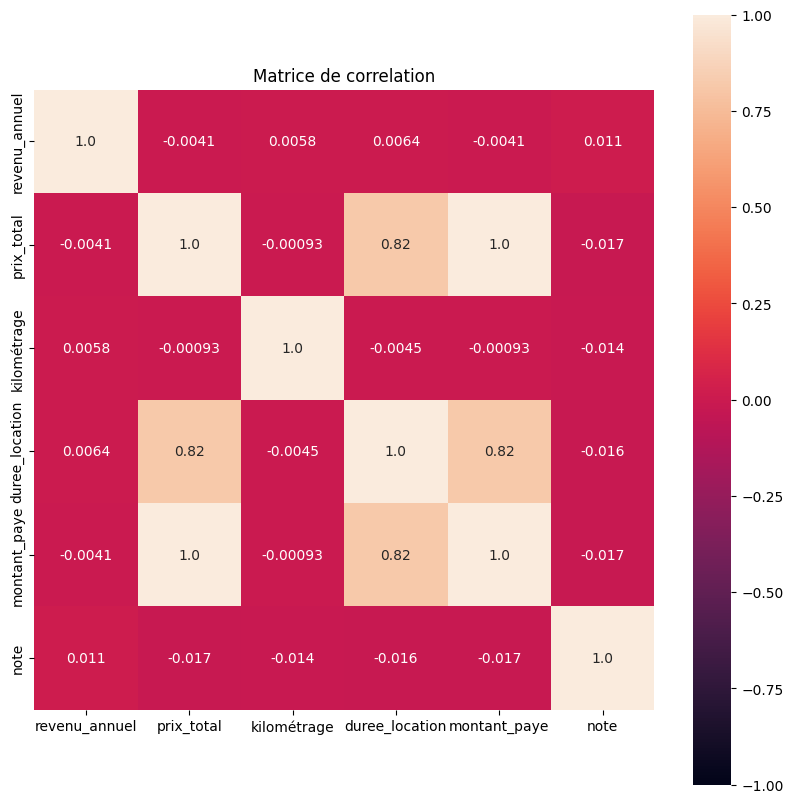

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_map, vmin=-1, fmt='.2', annot=True, square=True) # , fmt='.1%', cmap='viridis', square=True
plt.title('Matrice de correlation')
plt.show()

* On remarque une correlation proche de 1 entre le montant_payé (qui est égal au prix_total) et la duree de location
* Aucune autre correlation n'est visible

*********************

### Question 17 : Visualisez la distribution des principales variables numériques.


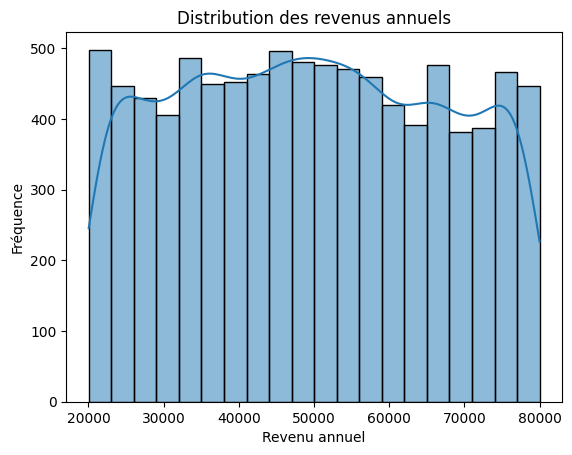

In [22]:
sns.histplot(master_df["revenu_annuel"], kde=True, bins=20)
plt.title('Distribution des revenus annuels')
plt.xlabel('Revenu annuel')
plt.ylabel('Fréquence')
plt.show()

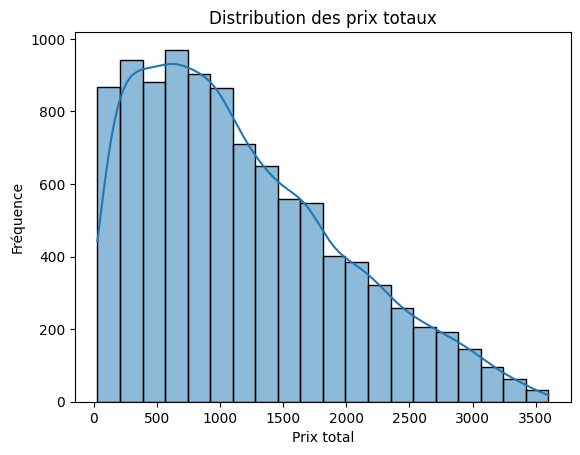

In [23]:
sns.histplot(master_df["prix_total"], kde=True, bins=20)
plt.title('Distribution des prix totaux')
plt.xlabel('Prix total')
plt.ylabel('Fréquence')
plt.show()

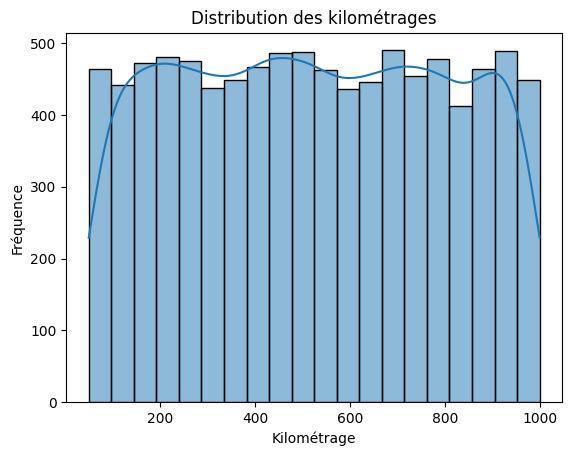

In [24]:
sns.histplot(master_df["kilométrage"], kde=True, bins=20)
plt.title('Distribution des kilométrages')
plt.xlabel('Kilométrage')
plt.ylabel('Fréquence')
plt.show()

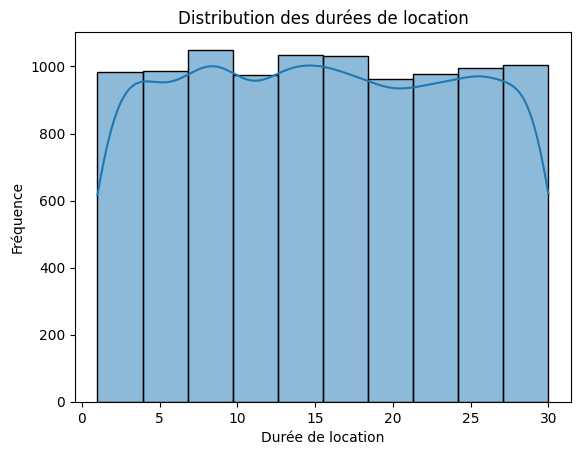

In [25]:
sns.histplot(master_df["duree_location"], kde=True, bins=10)
plt.title('Distribution des durées de location')
plt.xlabel('Durée de location')
plt.ylabel('Fréquence')
plt.show()

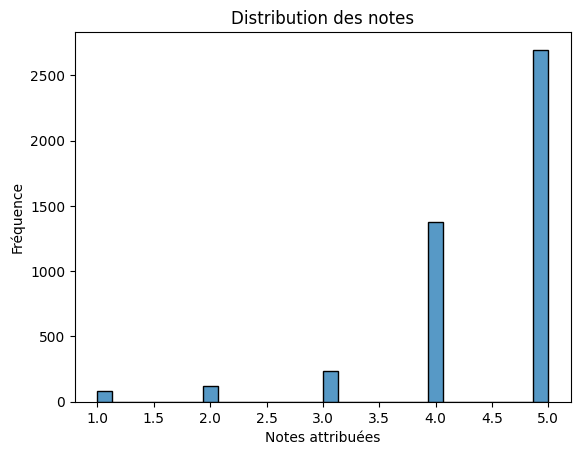

In [26]:

sns.histplot(master_df["note"], bins=30)
plt.title('Distribution des notes')
plt.xlabel('Notes attribuées')
plt.ylabel('Fréquence')
plt.show()

### Question 18 : Compléter vos analyses
Vous pourrez par exemple :

*  Analysez les tendances temporelles des locations.
*  Représentez les relations entre variables à l’aide de scatter plots.
* Représentez les variables catégoriques avec des diagrammes en barres.
* Affichez la répartition des paiements sous forme de camembert.

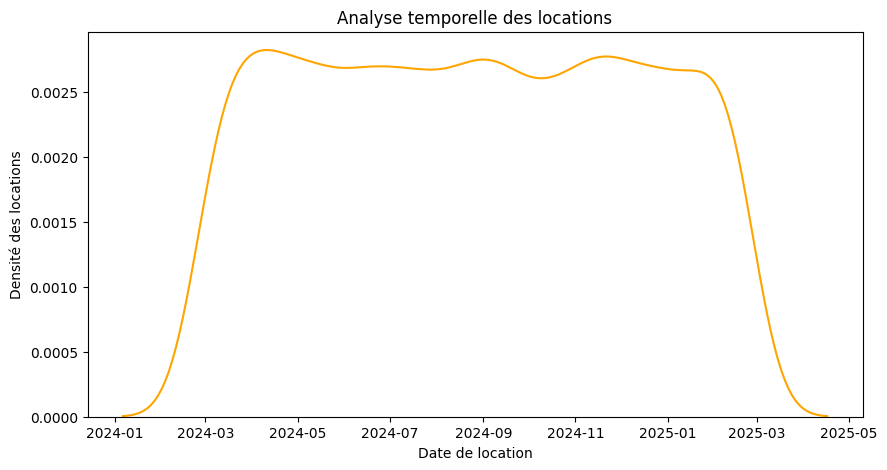

In [27]:
plt.figure(figsize=(10, 5))
sns.kdeplot(master_df['date_location'], color='orange')


plt.xlabel('Date de location')
plt.ylabel('Densité des locations')
plt.title('Analyse temporelle des locations')
plt.show()

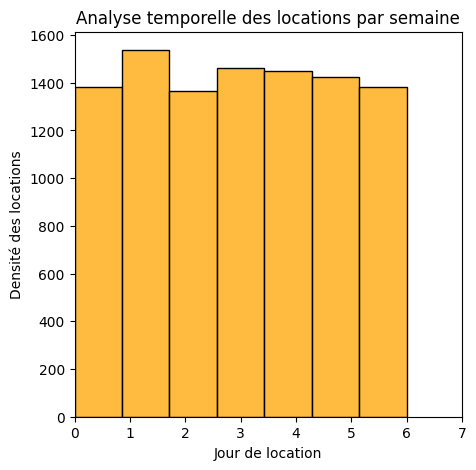

In [28]:

plt.figure(figsize=(5, 5))
sns.histplot(master_df['date_location'].dt.weekday, bins=7, color='orange')

plt.xlim(0,7)
plt.xlabel('Jour de location')
plt.ylabel('Densité des locations')
plt.title('Analyse temporelle des locations par semaine')
plt.show()


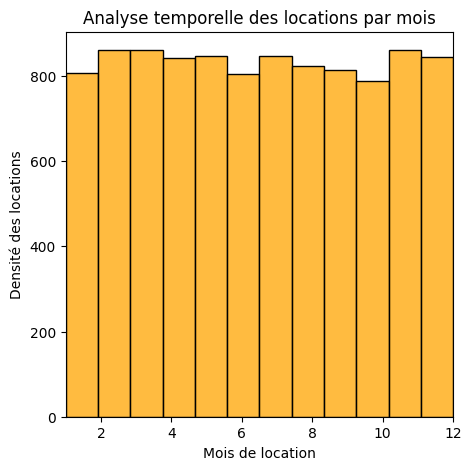

In [29]:
plt.figure(figsize=(5, 5))
# sns.kdeplot(master_df['date_location'].dt.weekday)
# sns.lineplot(master_df['date_location'].dt.weekday)
sns.histplot(master_df['date_location'].dt.month, bins=12, color='orange')

plt.xlim(1,12)
plt.xlabel('Mois de location')
plt.ylabel('Densité des locations')
plt.title('Analyse temporelle des locations par mois')
plt.show()

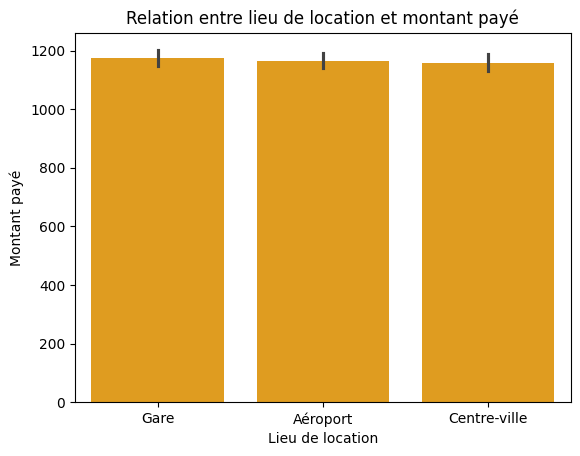

In [30]:
sns.barplot(data=master_df, x='lieu_location', y='montant_paye', color='orange')

plt.xlabel('Lieu de location')
plt.ylabel('Montant payé')
plt.title('Relation entre lieu de location et montant payé')
plt.show()

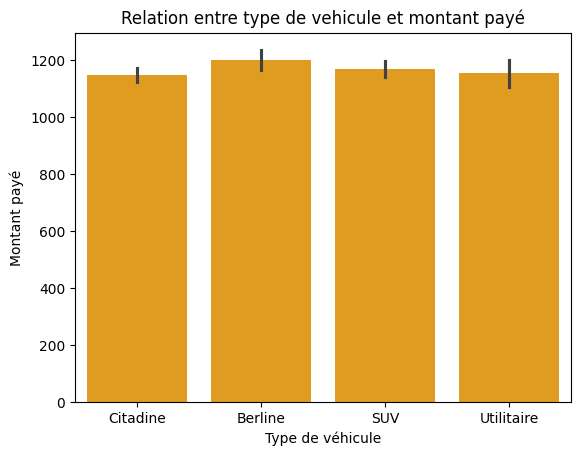

In [31]:
sns.barplot(data=master_df, x='type_vehicule_paiement', y='montant_paye', color='orange')

plt.xlabel('Type de véhicule')
plt.ylabel('Montant payé')
plt.title('Relation entre type de vehicule et montant payé')
plt.show()

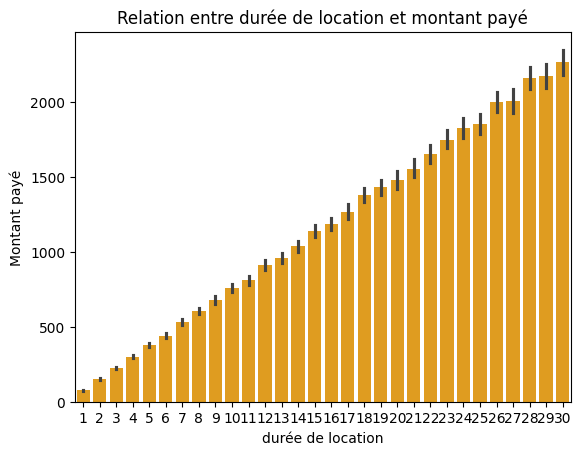

In [32]:
sns.barplot(data=master_df, x='duree_location', y='montant_paye', color='orange')

plt.xlabel('durée de location')
plt.ylabel('Montant payé')
plt.title('Relation entre durée de location et montant payé')
plt.show()

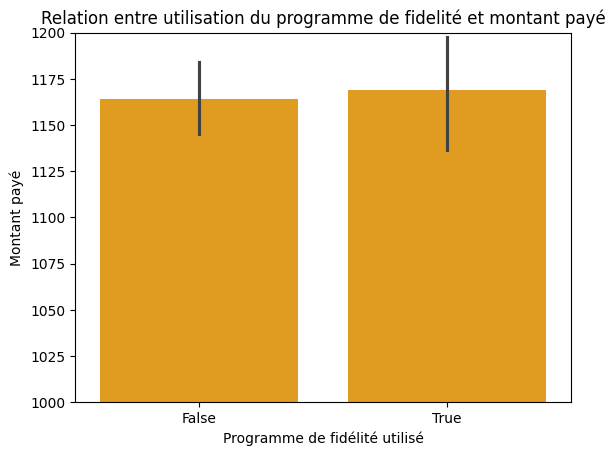

In [33]:
sns.barplot(data=master_df, x='programme_fidelite_utilise_paiement', y='montant_paye', color='orange')

plt.ylim(1000,1200)
plt.xlabel('Programme de fidélité utilisé')
plt.ylabel('Montant payé')
plt.title('Relation entre utilisation du programme de fidelité et montant payé')
plt.show()

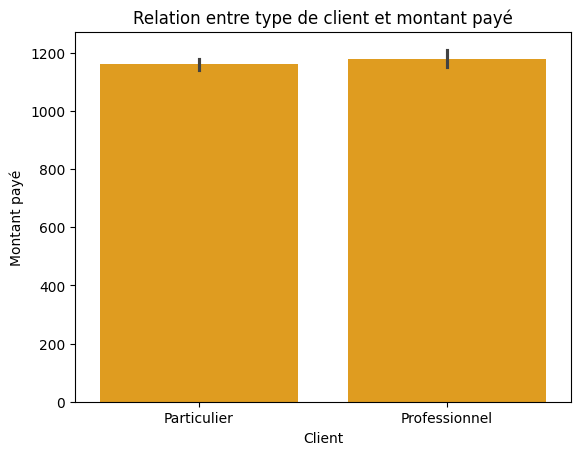

In [34]:
sns.barplot(data=master_df, x='type_client', y='montant_paye', color='orange')

plt.xlabel('Client')
plt.ylabel('Montant payé')
plt.title('Relation entre type de client et montant payé')
plt.show()

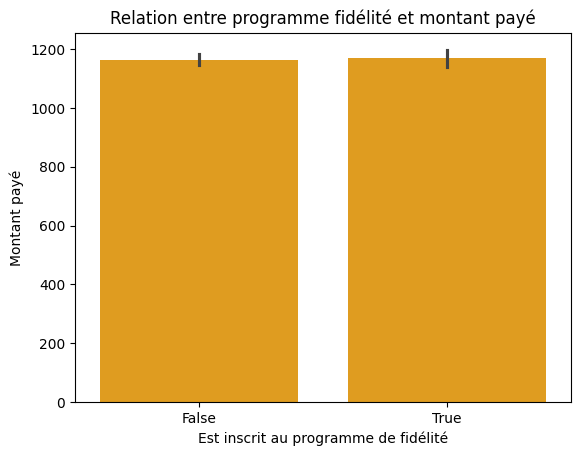

In [35]:
sns.barplot(data=master_df, x='programme_fidelite', y='montant_paye', color='orange')

plt.xlabel('Est inscrit au programme de fidélité')
plt.ylabel('Montant payé')
plt.title('Relation entre programme fidélité et montant payé')
plt.show()

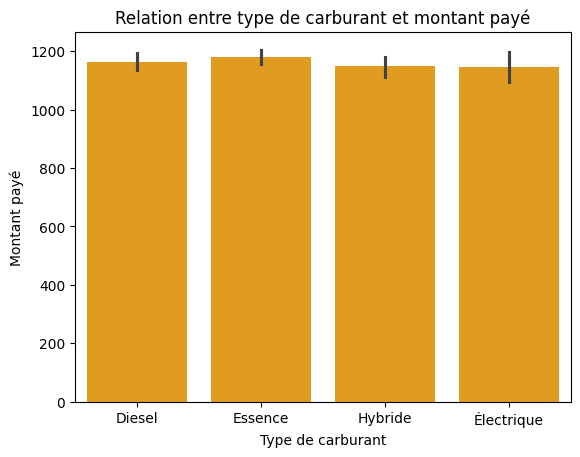

In [36]:
sns.barplot(data=master_df, x='type_carburant', y='montant_paye', color='orange')

plt.xlabel('Type de carburant')
plt.ylabel('Montant payé')
plt.title('Relation entre type de carburant et montant payé')
plt.show()

In [37]:
sns.catplot(data=table2, x='category', y='num_orders', kind="bar", height=6, aspect=2)
# plt.figure(figsize=(8,10)) # autre option pour ajuster la taille
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.title('Number of orders per food category',  fontweight='bold', fontsize=14)
plt.show()

NameError: name 'table2' is not defined

In [ ]:
master_df[col_cat]


,type_vehicule,lieu_location,programme_fidelite,statut_paiement
0,Citadine,Gare,True,Réussi
1,Citadine,Aéroport,True,Réussi
2,Citadine,Centre-ville,False,Réussi
3,Citadine,Gare,False,Réussi
4,Berline,Aéroport,True,Réussi
...,...,...,...,...
9995,Utilitaire,Aéroport,False,Réussi
9996,Citadine,Aéroport,False,Réussi
9997,Berline,Aéroport,False,Réussi
9998,SUV,Gare,True,Réussi


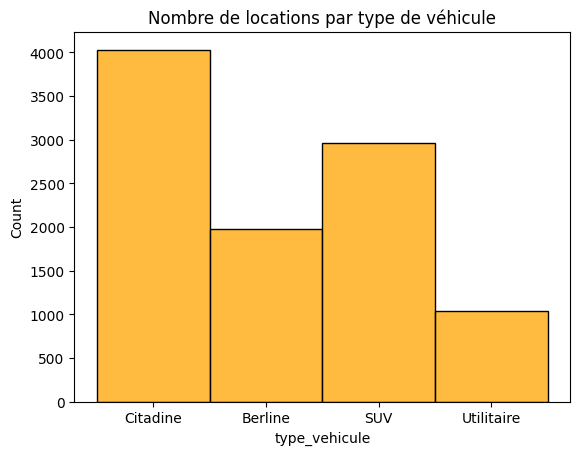

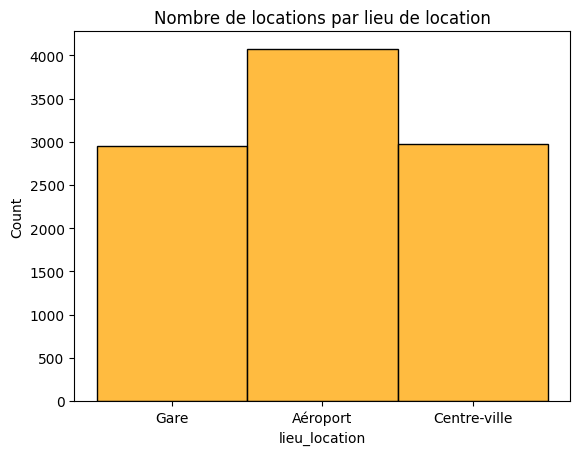

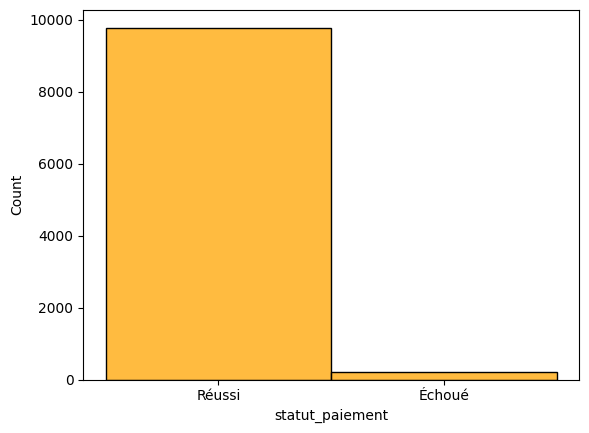

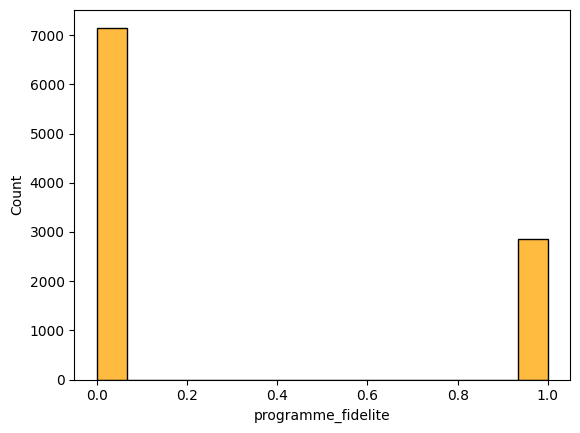

In [ ]:
sns.histplot(data=master_df['type_vehicule'], color='orange')
plt.title('Nombre de locations par type de véhicule')
plt.show()
sns.histplot(data=master_df['lieu_location'], color='orange')
plt.title('Nombre de locations par lieu de location')
plt.show()
sns.histplot(data=master_df['statut_paiement'], color='orange')
plt.show()
sns.histplot(data=master_df['programme_fidelite'], color='orange')
plt.show()


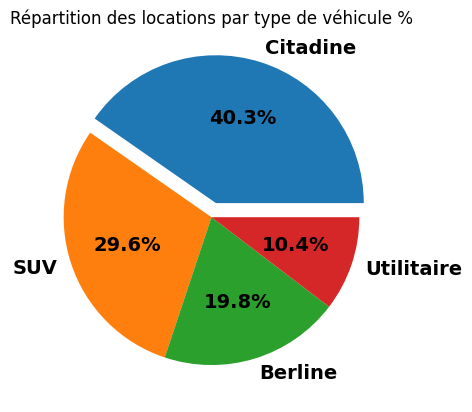

In [ ]:
counts = master_df['type_vehicule'].value_counts()

plt.pie(counts,
        labels=counts.index,
        autopct='%0.1f%%',
        explode=[0.1, 0, 0, 0],  # adapter selon besoin
        textprops={'weight': 'bold', 'fontsize': 14})
plt.title('Répartition des locations par type de véhicule %')
plt.show()

## 7. Insights Business et Prises de Décision

Créer une présentation Google Slides pour présenter vos résultats